In [2]:
# Import Libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import data
X_train = np.loadtxt('/content/drive/MyDrive/Data Latihan/Image Classification/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Data Latihan/Image Classification/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Data Latihan/Image Classification/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Data Latihan/Image Classification/labels_test.csv', delimiter = ',')

In [4]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (2000, 30000)
Shape of Y_train :  (2000,)
Shape of X_test :  (400, 30000)
Shape of Y_test :  (400,)


In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [6]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (2000, 100, 100, 3)
Shape of Y_train :  (2000, 1)
Shape of X_test :  (400, 100, 100, 3)
Shape of Y_test :  (400, 1)


In [7]:
X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

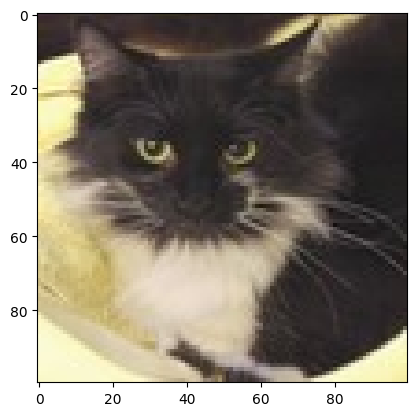

In [14]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

#Membuat Model

In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 792ms/step - accuracy: 0.7942 - loss: 0.4600
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 747ms/step - accuracy: 0.8313 - loss: 0.3984
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 718ms/step - accuracy: 0.8457 - loss: 0.3333
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 708ms/step - accuracy: 0.8834 - loss: 0.2891
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 695ms/step - accuracy: 0.9057 - loss: 0.2419


**Analisis**

Pada dataset, nilai loss nya menurun tetapi nilai accuracynya meningkat. Nilai akurasinya sudah mencapai 73%. Untuk meningkatkan akurasinya, kita bisa melakukan percobaan lagi.

In [20]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7045 - loss: 0.6856


[0.7208466529846191, 0.6875]

**Analisis**

Hasil pengujian terhadap data diuji adalah 70% akurat. Dapat dikatakan bahwa model sequential merupakan model yang tepat untuk dataset ini

#Membuat Prediksi

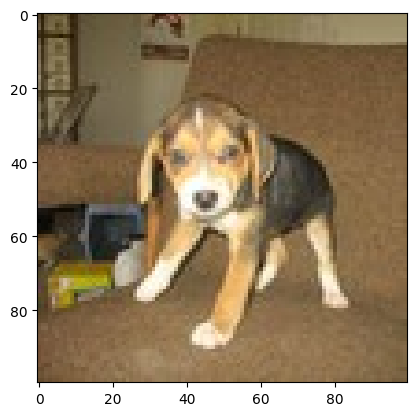

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Our model says it is a : dog


In [28]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

**Kesimpulan :**

Model Sequential pada CNN ini mampu mengenal data gambar dengan benar. Hal ini bisa dilihat dari hasil prediksinya.